## Pre-requisite test

In [82]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time

#### 1. How many multiplications and additions do you need to perform a matrix multiplication between a (n, k) and (k, m) matrix? Explain.

In [83]:
# Matrix multiplication complexity
# For two matrices A (n x k) and B (k x m),
# each element in the result matrix C (n x m) is computed using k multiplications and (k - 1) additions.
# So total multiplications: n * m * k
# Total additions: n * m * (k - 1)

#### 2. Write Python code to multiply the above two matrices. Solve using list of lists and then use numpy. Compare the timing of both solutions. Which one is faster? Why?

In [84]:
n, k, m = 200, 200, 200
a = [[np.random.rand() for i in range(n)] for i in range (k)]
b = [[np.random.rand() for i in range(k)] for i in range (m)]
c = [[0 for i in range(n)] for i in range (m)]

t_in = time.time()
C = [[__builtins__.sum(a[i][l] * b[l][j] for l in range(k)) for j in range(m)] for i in range(n)]
t_out = time.time()
print("Time took to compute the matrix multiplication using lists is:", t_out-t_in)

t_in = time.time()
a = np.array(a)
b = np.array(b)
c = np.matmul(a,b)
t_out = time.time()
print("Time took to compute the matrix multiplication using array is:", t_out-t_in)
print("Numpy is faster because it uses C programming language, which is optimized for machines-level operations.")

Time took to compute the matrix multiplication using lists is: 0.64813232421875
Time took to compute the matrix multiplication using array is: 0.004567146301269531
Numpy is faster because it uses C programming language, which is optimized for machines-level operations.


#### 3. Finding the highest element in a list requires one pass of the array. Finding the second highest element requires 2 passes of the array. Using this method, what is the time complexity of finding the median of the array? Can you suggest a better method? Can you implement both these methods in Python and compare against `numpy.median` routine in terms of time?

| Method          | Code speed       | Algorithm speed | 
| --------------- | ---------------- | --------------- | 
| `np.median()`   | Fastest       | O(n log n)      | 
| `quickselect()` | Slower        | O(n) average    | 
| `statistic.median` | Slower        | O(n log n)      |
| `pass_method()` | Very slow | O(n²)           | 

In [85]:
import statistics
import random
arr = np.array([np.random.choice(10001) for i in range(10001)])

def pass_method(arr):
    arr_copy = arr.copy().tolist()
    n = len(arr_copy)
    k = n // 2

    for _ in range(k):
        max_val = max(arr_copy)
        arr_copy.remove(max_val)

    return max(arr_copy)

# This part of code is given by CHATGPT I do not know this Quick select algorithm
def quickselect(arr, k):
    if len(arr) == 1:
        return arr[0]
    pivot = random.choice(arr)
    lows = [el for el in arr if el < pivot]
    highs = [el for el in arr if el > pivot]
    pivots = [el for el in arr if el == pivot]
    
    if k < len(lows):
        return quickselect(lows, k)
    elif k < len(lows) + len(pivots):
        return pivots[0]
    else:
        return quickselect(highs, k - len(lows) - len(pivots))

def quickselect_median(arr):
    arr_copy = arr.tolist()
    n = len(arr_copy)
    if n % 2 == 1:
        return quickselect(arr_copy, n // 2)
    else:
        return (quickselect(arr_copy, n // 2 - 1) + quickselect(arr_copy, n // 2)) / 2

start = time.time()
print(pass_method(arr))
end = time.time()
print("Time for pass_method:", end - start)

start = time.time()
print(statistics.median(arr))
end = time.time()
print("Time for statistics.median:", end - start)

start = time.time()
print(quickselect_median(arr))
end = time.time()
print("Time for quickselect:", end - start)

start = time.time()
print(np.median(arr))
end = time.time()
print("Time for np.median:", end - start)

4967
Time for pass_method: 0.5296056270599365
4967
Time for statistics.median: 0.0029075145721435547
4967
Time for quickselect: 0.003084421157836914
4967.0
Time for np.median: 0.0005424022674560547


#### 4. What is the gradient of the following function with respect to x and y?

$$ z = x^2y + y^3\sin(x) $$

Gradient of the function

We are given:

$$
f(x, y) = x^2y + y^3\sin(x)
$$


1. Partial derivative of the given function with respect to \(x\):

$$
f_x = \frac{\partial}{\partial x}\big(x^2y + y^3\sin(x)\big)
$$

$$
f_x = 2xy + y^3\cos(x)
$$


2. Partial derivative of the given function with respect to \(y\):

$$
f_y = \frac{\partial}{\partial y}\big(x^2y + y^3\sin(x)\big)
$$

$$
f_y = x^2 + 3y^2\sin(x)
$$

So the final answer is:

$$
\nabla f(x, y) =
\begin{pmatrix}
2xy + y^3\cos(x) \\
x^2 + 3y^2\sin(x)
\end{pmatrix}
$$


## 5. Use `JAX` to confirm the gradient evaluated by your method matches the analytical solution corresponding to a few random values of x and y.

In [86]:
import jax
import jax.numpy as jnp

def compute_function(x, y):
    return x**2 * y + y**3 * jnp.sin(x)
compute_jax_gradient = jax.grad(compute_function, argnums=(0, 1))

def compute_analytical_gradient(x, y):
    grad_x = 2 * x * y + y**3 * np.cos(x)
    grad_y = x**2 + 3 * y**2 * np.sin(x)
    return grad_x, grad_y

for i in range(5):
    x_val, y_val = np.random.uniform(-10, 10, size=2)

    # Evaluate gradients
    jax_grad_x, jax_grad_y = compute_jax_gradient(x_val, y_val)
    analytical_grad_x, analytical_grad_y = compute_analytical_gradient(float(x_val), float(y_val))

    # Display results
    print(f"\nTest Case {i+1}: x = {x_val:.4f}, y = {y_val:.4f}")
    print(f"JAX Gradient        -> df/dx = {jax_grad_x:.4f}, df/dy = {jax_grad_y:.4f}")
    print(f"Analytical Gradient -> df/dx = {analytical_grad_x:.4f}, df/dy = {analytical_grad_y:.4f}")



Test Case 1: x = 3.3479, y = 5.7781
JAX Gradient        -> df/dx = -150.1282, df/dy = -9.3114
Analytical Gradient -> df/dx = -150.1282, df/dy = -9.3114

Test Case 2: x = 6.1598, y = 8.4299
JAX Gradient        -> df/dx = 698.3542, df/dy = 11.7093
Analytical Gradient -> df/dx = 698.3542, df/dy = 11.7093

Test Case 3: x = 5.5405, y = -7.2024
JAX Gradient        -> df/dx = -355.0395, df/dy = -74.5442
Analytical Gradient -> df/dx = -355.0395, df/dy = -74.5442

Test Case 4: x = 7.4731, y = 0.7726
JAX Gradient        -> df/dx = 11.7181, df/dy = 57.5088
Analytical Gradient -> df/dx = 11.7181, df/dy = 57.5088

Test Case 5: x = 0.2464, y = -7.4867
JAX Gradient        -> df/dx = -410.6445, df/dy = 41.0756
Analytical Gradient -> df/dx = -410.6445, df/dy = 41.0756


## 6. Use `sympy` to confirm that you obtain the same gradient analytically.

In [87]:
import sympy as sp

x, y = sp.symbols('x y')
f = x**2 * y + y**3 * sp.sin(x)

grad_sympy = [sp.diff(f, var) for var in (x, y)]
grad_sympy

[2*x*y + y**3*cos(x), x**2 + 3*y**2*sin(x)]

## 7. Create a Python nested dictionary to represent hierarchical information. We want to store record of students and their marks. Something like:
```
2022
    Branch 1
        Roll Number: 1, Name: N, Marks:
            Maths: 100, English: 70 ...
    Branch 2
2023
    Branch 1
    Branch 2
2024
    Branch 1
    Branch 2
2025
    Branch 1
    Branch 2
```

In [88]:
students_data = {
    2022: {
        "Branch 1": [
            {"Roll Number": 1, "Name": "0", "Marks": {"Maths": 100, "English": 70, "Science": 85}},
            {"Roll Number": 2, "Name": "1", "Marks": {"Maths": 90, "English": 80, "Science": 88}}
        ],
        "Branch 2": [
            {"Roll Number": 3, "Name": "A", "Marks": {"Maths": 95, "English": 75, "Science": 90}},
            {"Roll Number": 4, "Name": "B", "Marks": {"Maths": 85, "English": 90, "Science": 80}}
        ]
    },
    2023: {
        "Branch 1": [
            {"Roll Number": 5, "Name": "C", "Marks": {"Maths": 92, "English": 78, "Science": 84}},
            {"Roll Number": 6, "Name": "D", "Marks": {"Maths": 88, "English": 82, "Science": 86}}
        ],
        "Branch 2": [
            {"Roll Number": 7, "Name": "E", "Marks": {"Maths": 91, "English": 76, "Science": 89}},
            {"Roll Number": 8, "Name": "F", "Marks": {"Maths": 87, "English": 85, "Science": 83}}
        ]
    },
    2024: {
        "Branch 1": [
            {"Roll Number": 9, "Name": "G", "Marks": {"Maths": 93, "English": 79, "Science": 85}},
            {"Roll Number": 10, "Name": "H", "Marks": {"Maths": 89, "English": 81, "Science": 87}}
        ],
        "Branch 2": [
            {"Roll Number": 11, "Name": "I", "Marks": {"Maths": 94, "English": 77, "Science": 88}},
            {"Roll Number": 12, "Name": "J", "Marks": {"Maths": 86, "English": 84, "Science": 82}}
        ]
    },
    2025: {
        "Branch 1": [
            {"Roll Number": 13, "Name": "K", "Marks": {"Maths": 95, "English": 80, "Science": 90}},
            {"Roll Number": 14, "Name": "L", "Marks": {"Maths": 90, "English": 85, "Science": 88}}
        ],
        "Branch 2": [
            {"Roll Number": 15, "Name": "M", "Marks": {"Maths": 92, "English": 78, "Science": 86}},
            {"Roll Number": 16, "Name": "N", "Marks": {"Maths": 88, "English": 82, "Science": 84}}
        ]
    }
}

## 8. Store the same information using Python classes. We have an overall database which is a list of year objects. Each year contains a list of branches. Each branch contains a list of students. Each student has some properties like name, roll number and has marks in some subjects.

In [89]:
class Student:
    def __init__(self, roll_number, name, marks):
        self.roll_number = roll_number
        self.name = name
        self.marks = marks

    def __repr__(self):
        return f"Student({self.roll_number}, {self.name}, {self.marks})"


class Branch:
    def __init__(self, name):
        self.name = name
        self.students = []

    def add_student(self, student):
        self.students.append(student)

    def __repr__(self):
        return f"Branch({self.name}, Students={len(self.students)})"


class Year:
    def __init__(self, year):
        self.year = year
        self.branches = []

    def add_branch(self, branch):
        self.branches.append(branch)

    def __repr__(self):
        return f"Year({self.year}, Branches={len(self.branches)})"

database = []

for year_key, branches in students_data.items():
    year_obj = Year(year_key)
    for branch_name, students in branches.items():
        branch_obj = Branch(branch_name)
        for student in students:
            student_obj = Student(student["Roll Number"], student["Name"], student["Marks"])
            branch_obj.add_student(student_obj)
        year_obj.add_branch(branch_obj)
    database.append(year_obj)

for year in database:
    print(f"Year: {year.year}")
    for branch in year.branches:
        print(f"  Branch: {branch.name}")
        for student in branch.students:
            print(f"    {student}")


Year: 2022
  Branch: Branch 1
    Student(1, 0, {'Maths': 100, 'English': 70, 'Science': 85})
    Student(2, 1, {'Maths': 90, 'English': 80, 'Science': 88})
  Branch: Branch 2
    Student(3, A, {'Maths': 95, 'English': 75, 'Science': 90})
    Student(4, B, {'Maths': 85, 'English': 90, 'Science': 80})
Year: 2023
  Branch: Branch 1
    Student(5, C, {'Maths': 92, 'English': 78, 'Science': 84})
    Student(6, D, {'Maths': 88, 'English': 82, 'Science': 86})
  Branch: Branch 2
    Student(7, E, {'Maths': 91, 'English': 76, 'Science': 89})
    Student(8, F, {'Maths': 87, 'English': 85, 'Science': 83})
Year: 2024
  Branch: Branch 1
    Student(9, G, {'Maths': 93, 'English': 79, 'Science': 85})
    Student(10, H, {'Maths': 89, 'English': 81, 'Science': 87})
  Branch: Branch 2
    Student(11, I, {'Maths': 94, 'English': 77, 'Science': 88})
    Student(12, J, {'Maths': 86, 'English': 84, 'Science': 82})
Year: 2025
  Branch: Branch 1
    Student(13, K, {'Maths': 95, 'English': 80, 'Science': 90})

## 9. Using matplotlib plot the following functions on the domain: x = 0.5 to 100.0 in steps of 0.5.

1. $y = x$
2. $y = x^2$
3. $y = \frac{x^3}{100}$
4. $y = \sin(x)$
5. $y = \frac{\sin(x)}{x}$
6. $y = \log(x)$
7. $y = e^x$

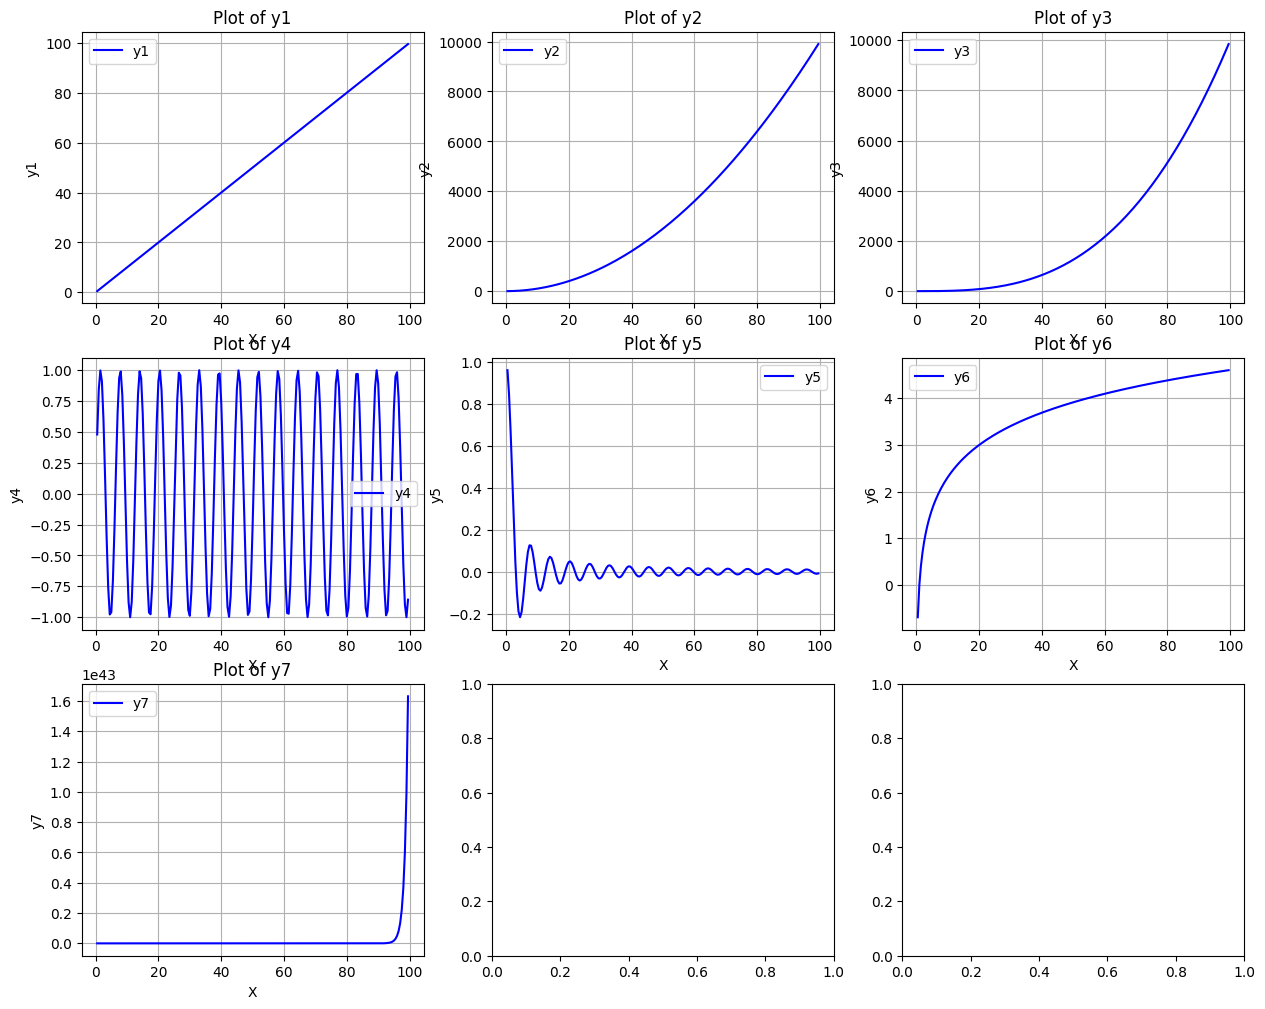

In [90]:
X = np.arange(0.5, 100, 0.5)
y1 = X
y2 = np.power(X, 2)
y3 = (np.power(X,3))/100
y4 = np.sin(X)
y5 = y4/X
y6 = np.log(X)
y7 = np.exp(X)

fig, axs = plt.subplots(3, 3, figsize=(15, 12))
for i in range(7):
    axs[i//3, i%3].plot(X, eval(f'y{i+1}'), label=f'y{i+1}', color='blue')
    axs[i//3, i%3].set_title(f'Plot of y{i+1}')
    axs[i//3, i%3].set_xlabel('X')
    axs[i//3, i%3].set_ylabel(f'y{i+1}')
    axs[i//3, i%3].legend()
    axs[i//3, i%3].grid()

## 10. Using numpy generate a matrix of size `20x5` containing random numbers drawn uniformly from the range of 1 to 2. Using Pandas create a dataframe out of this matrix. Name the columns of the dataframe as “a”, “b”, “c”, “d”, “e”. Find the column with the highest standard deviation. Find the row with the lowest mean.

In [91]:
matrix = np.random.uniform(1, 2, (20, 5))
df = pd.DataFrame(matrix, columns=['A', 'B', 'C', 'D', 'E'])
df_1 = df.copy()
df_1['mean'] = df.mean(axis=1)
print("The row number with owest mean is:",df_1[df_1['mean']==df_1['mean'].min()].index[0]+1,",With the lowest mean of", df_1['mean'].min())
column_Std= df.std()
Highest_Column_Std=column_Std.idxmax()
print(f"Column with highest standard deviation: {Highest_Column_Std}")

The row number with owest mean is: 15 ,With the lowest mean of 1.1153012842620145
Column with highest standard deviation: A


## 11. Add a new column to the dataframe called “f” which is the sum of the columns “a”, “b”, “c”, “d”, “e”. Create another column called “g”. The value in the column “g” should be “LT8” if the value in the column “f” is less than 8 and “GT8” otherwise. Find the number of rows in the dataframe where the value in the column “g” is “LT8”. Find the standard deviation of the column “f” for the rows where the value in the column “g” is “LT8” and “GT8” respectively.

In [92]:
df['f'] = df.sum(axis=1)
df['g'] = np.where(df['f'] > 8, "GT8", "LT8")
count = df['g'].value_counts()
print("Count of GT8 and LT8 in column 'g':", count)
df.groupby('g')["f"].std()

Count of GT8 and LT8 in column 'g': g
LT8    17
GT8     3
Name: count, dtype: int64


g
GT8    0.031188
LT8    0.723226
Name: f, dtype: float64

## 12. Write a small piece of code to explain broadcasting in numpy.

In [93]:
A = np.ones((3, 4))
B = np.array([0, 1, 2, 3])
print("A:\n", A)
print("\nb:", B)
print("\nA + b:\n", A + B)

A:
 [[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

b: [0 1 2 3]

A + b:
 [[1. 2. 3. 4.]
 [1. 2. 3. 4.]
 [1. 2. 3. 4.]]


Here A is a 3x4 matrix and b is a 1D array with 4 elements. When we add them, numpy broadcasts b to match the shape of A, resulting in a 3x4 matrix where each row of A is added to b like this:
```lol
 [[1. 1. 1. 1.]     [[0 1 2 3]     [[2. 3. 4. 5.]
  [1. 1. 1. 1.]   +  [0 1 2 3]  =   [2. 3. 4. 5.]
  [1. 1. 1. 1.]]     [0 1 2 3]]     [2. 3. 4. 5.]]
The result is a new array where each row of A has been added to the corresponding element of B.

## 13. Write a function to compute the `argmin` of a numpy array. The function should take a numpy array as input and return the index of the minimum element. You can use the `np.argmin` function to verify your solution.

In [94]:
def manual_argmin(array):
    min_index = 0
    min_value = array[0]
    
    for index in range(1, len(array)):
        if array[index] < min_value:
            min_value = array[index]
            min_index = index
    
    return min_index
arr_np = np.random.uniform(-50, 50, size=1000)
manual_index = manual_argmin(arr_np)
numpy_index = np.argmin(arr_np)

print(f"Manual argmin index: {manual_index}")
print(f"NumPy argmin index:  {numpy_index}")


Manual argmin index: 879
NumPy argmin index:  879
